In [1]:
import sys, re
sys.path.append('../python/')
from data.IGRA import Monthly
from data.NCDC import GHCND
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs

In [2]:
%matplotlib nbagg

In [3]:
# IGRA (radiosonde archive)
ista = Monthly.read_stations('../../data/IGRA/igra2-station-list.txt').query('lat<=-60')

In [22]:
mly = Monthly.tar_to_xarray('../../data/IGRA/IGRA-mly.tar.gz', ista.id, tar=re.compile('ghgt'))

In [23]:
gp = mly.data.sel(type='value', lvl=500)['ghgt']

<IPython.core.display.Javascript object>


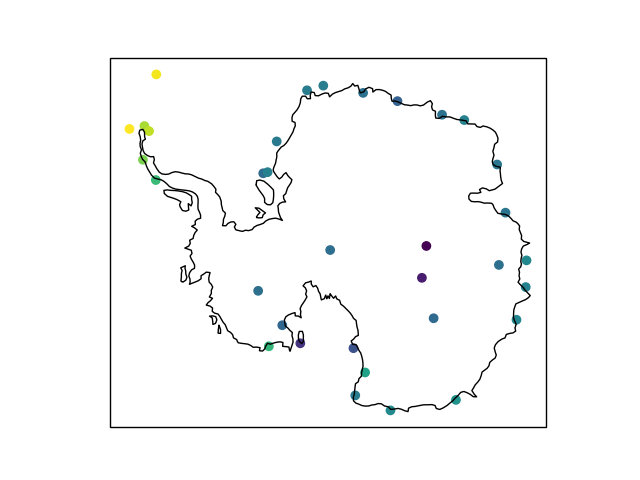

In [38]:
fig, axs = plt.subplots(subplot_kw={'projection': crs.SouthPolarStereo()})

plt.scatter(*ista.loc[gp.station][['lon', 'lat']].as_matrix().T, c=gp.mean('time'), transform=crs.PlateCarree())
axs.coastlines()

In [19]:
from pca.pca import probPCA

In [53]:
x = gp.to_masked_array()

In [20]:
import gc
gc.collect()

0

In [30]:
# longest record
ista.loc[89592]

id            AYM00089592
lat              -66.5519
lon               93.0147
elev                 43.4
state                 NaN
name               MIRNYJ
first_year           1956
last_year            2017
nobs                33855
Name: 89592, dtype: object

In [55]:
pca = probPCA(gp.to_masked_array(), convergence_test='data_loss').run(20000)

 8590/20000 [ 42%] ████████████                   ETA: 97s | Loss: 153883.047

<IPython.core.display.Javascript object>


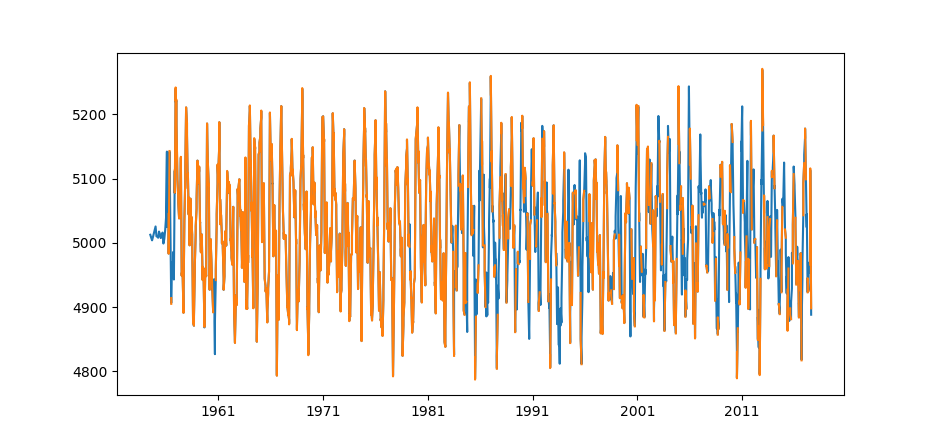

In [57]:
plt.figure()
plt.plot(gp.time, pca.x[22, :])
plt.plot(gp.time, gp.sel(station=89592))

In [44]:
pca.x.shape

(1494, 34)

In [58]:
pca.Z.shape

(1494, 34)

In [61]:
pca.W.shape

(34, 34)

<IPython.core.display.Javascript object>


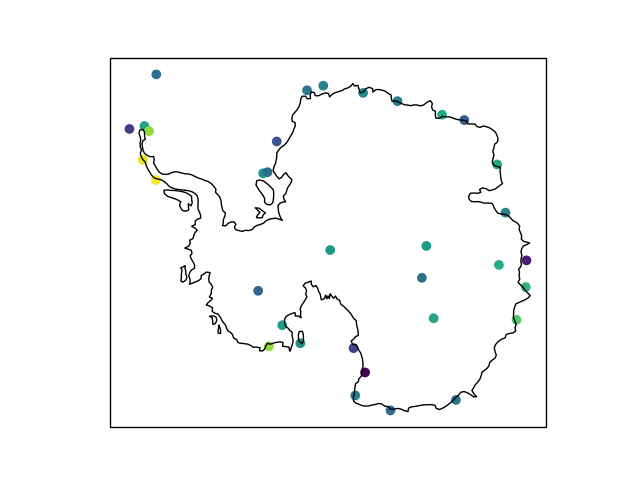

In [64]:
fig, axs = plt.subplots(subplot_kw={'projection': crs.SouthPolarStereo()})

plt.scatter(*ista.loc[gp.station][['lon', 'lat']].as_matrix().T, c=pca.W[:,2], transform=crs.PlateCarree())
axs.coastlines()